In [1]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sb
sb.set_color_codes()

In [2]:
sample = pd.read_csv('paper_stuff/data/Unbiased_Columbia_Yelp_Reviews_Labeled_3_3_17.csv')

In [3]:
sample['text'] = sample['text'].map(lambda x:x.replace('\n', ' ').replace('\r', ' ').replace('"', "'").decode("ascii", "ignore"))
sample['Is_Foodborne'] = sample['Is_Foodborne'].map(lambda x: 1 if x=='Yes' else 0)
sample['Is_Multiple_Foodborne'] = sample['Is_Multiple_Foodborne'].map(lambda x: 1 if x=='Yes' else 0)

In [4]:
# write out the reviews to java code to put in the testing file so we can get scores from old classifier
# for t in sample['text'].tolist()[:5]:
#     print 'review.setText("{}");'.format(t),
#     print 'texts.add(review);',
#     print
# print 'List<String> texts = Arrays.asList("{}");'.format('", "'.join(sample['text'].tolist()))

In [5]:
old_sick_scores = [ 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.3579464031502253, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.04905285050785552, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.5118049167727338, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.17469372341658027, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07536624440932928, 0.07137683283251417, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.17469372341658027, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.890525821221511, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.04905285050785552, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07137683283251417, 0.051412979585773726, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.051412979585773726, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.3579464031502253, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.051412979585773726, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.2760367424936205, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.9071096696811448, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.43971721037335615, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.3135019587057808, 0.051412979585773726, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.04905285050785552, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.5713768850512982, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.04905285050785552, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.9078743041101244, 0.11283146062148962, 0.04917116349635638, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.04917116349635638, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.051412979585773726, 0.07515244203461337, 0.051412979585773726, 0.07515244203461337, 0.04905285050785552, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.051412979585773726, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.12181715004359311, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.051412979585773726, 0.11283146062148962, 0.04917116349635638, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.036447888374736344, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.17469372341658027, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.54922384618587, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.07515244203461337, 0.051412979585773726, 0.07137683283251417, 0.051412979585773726, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07717729383884442, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.04905285050785552, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.07515244203461337, 0.3579464031502253, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.45319403090335947, 0.11283146062148962, 0.04905285050785552, 0.07536624440932928, 0.07515244203461337, 0.04917116349635638, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.3135019587057808, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.051412979585773726, 0.07137683283251417, 0.04905285050785552, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.051412979585773726, 0.051412979585773726, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.12181715004359311, 0.07515244203461337, 0.11283146062148962, 0.07137683283251417, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.07137683283251417, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.07536624440932928, 0.051412979585773726, 0.04905285050785552, 0.04905285050785552, 0.11283146062148962, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.07137683283251417, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07137683283251417, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962,  ]

In [6]:
print len(old_sick_scores)

1000


In [7]:
old_mult_scores = [ 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.0, 0.05555555555555555, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.0, 1.0, 0.05555555555555555, 0.6666666666666666, 0.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.6666666666666666, 1.0, 0.05555555555555555, 0.0, 0.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 0.0, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 0.6666666666666666, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.6666666666666666, 0.05555555555555555, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 0.0, 1.0, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.0, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 1.0, 0.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 1.0, 0.0, 0.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.6666666666666666, 1.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 0.0, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.0, 0.6666666666666666, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 0.6666666666666666, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 0.0, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.6666666666666666, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 1.0, 1.0, 0.0, 0.05555555555555555, 0.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.6666666666666666, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 0.0, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 0.6666666666666666, 0.0, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 1.0, 0.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 0.6666666666666666, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 1.0, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.6666666666666666, 0.6666666666666666, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.0, 0.6666666666666666, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.6666666666666666, 0.0, 1.0, 0.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.6666666666666666, 0.0, 1.0, 1.0, 0.0, 1.0, 0.6666666666666666, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.6666666666666666, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 0.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.05555555555555555, 1.0, 0.0, 0.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555,  ]

In [8]:
print len(old_mult_scores)

1000


# Load in the newer models

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib

In [10]:
!ls paper_stuff/best_classifiers/

logreg_mult_best.pkl        sick_logreg_best.pkl
logreg_mult_best.pkl_01.npy sick_logreg_best.pkl_01.npy
logreg_mult_best.pkl_02.npy sick_logreg_best.pkl_02.npy
logreg_mult_best.pkl_03.npy sick_logreg_best.pkl_03.npy
logreg_mult_best.pkl_04.npy sick_logreg_best.pkl_04.npy
logreg_mult_best.pkl_05.npy sick_logreg_best.pkl_05.npy
logreg_mult_best.pkl_06.npy sick_logreg_best.pkl_06.npy


# Analyzing new vs old sick classifier

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [13]:
new = joblib.load('paper_stuff/best_classifiers/sick_logreg_best.pkl')

/Users/thomaseffland/.virtualenvs/research/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator CountVectorizer from version pre-0.18 when using version 0.18. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/thomaseffland/.virtualenvs/research/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator TfidfTransformer from version pre-0.18 when using version 0.18. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/thomaseffland/.virtualenvs/research/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version pre-0.18 when using version 0.18. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/thomaseffland/.virtualenvs/research/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator P

In [14]:
old_sick_scores = [ 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.3579464031502253, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.04905285050785552, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.5118049167727338, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.17469372341658027, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07536624440932928, 0.07137683283251417, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.17469372341658027, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.890525821221511, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.04905285050785552, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07137683283251417, 0.051412979585773726, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.051412979585773726, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.3579464031502253, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.051412979585773726, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.2760367424936205, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.9071096696811448, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.43971721037335615, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.3135019587057808, 0.051412979585773726, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.04905285050785552, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.5713768850512982, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.04905285050785552, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.9078743041101244, 0.11283146062148962, 0.04917116349635638, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.04917116349635638, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.051412979585773726, 0.07515244203461337, 0.051412979585773726, 0.07515244203461337, 0.04905285050785552, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.051412979585773726, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.12181715004359311, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.051412979585773726, 0.11283146062148962, 0.04917116349635638, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.036447888374736344, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.17469372341658027, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.54922384618587, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.07515244203461337, 0.051412979585773726, 0.07137683283251417, 0.051412979585773726, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07717729383884442, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.04905285050785552, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.07515244203461337, 0.3579464031502253, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.45319403090335947, 0.11283146062148962, 0.04905285050785552, 0.07536624440932928, 0.07515244203461337, 0.04917116349635638, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.3135019587057808, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.051412979585773726, 0.07137683283251417, 0.04905285050785552, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.051412979585773726, 0.051412979585773726, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.12181715004359311, 0.07515244203461337, 0.11283146062148962, 0.07137683283251417, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.07137683283251417, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.07536624440932928, 0.051412979585773726, 0.04905285050785552, 0.04905285050785552, 0.11283146062148962, 0.07515244203461337, 0.07137683283251417, 0.11283146062148962, 0.07137683283251417, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.07515244203461337, 0.07536624440932928, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.051412979585773726, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.07137683283251417, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962, 0.04905285050785552, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07137683283251417, 0.07515244203461337, 0.07536624440932928, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.11283146062148962, 0.07515244203461337, 0.11283146062148962, 0.07536624440932928, 0.11283146062148962, 0.11283146062148962, 0.11283146062148962  ]

In [47]:
new_sick_scores = new.predict_proba(sample['text'])[:,1]

In [48]:
sick_true_labels = sample['Is_Foodborne'].as_matrix()

Old Classifier
AUC = 0.997587939698
Confusion matrix, without normalization
[[993   2]
 [  1   4]]


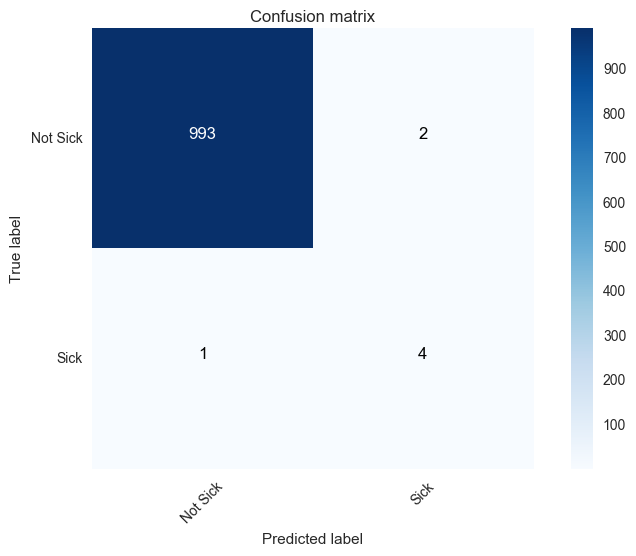

In [49]:
labels = ['Not Sick','Sick']
print 'Old Classifier'
print 'AUC = {}'.format(roc_auc_score(sick_true_labels, old_sick_scores))
old_sick_preds = [1 if s > .5 else 0 for s in old_sick_scores]
plot_confusion_matrix(confusion_matrix(sick_true_labels, old_sick_preds), labels)
plt.grid(False)

New Classifier
AUC = 0.837386934673
Confusion matrix, without normalization
[[919  76]
 [  1   4]]



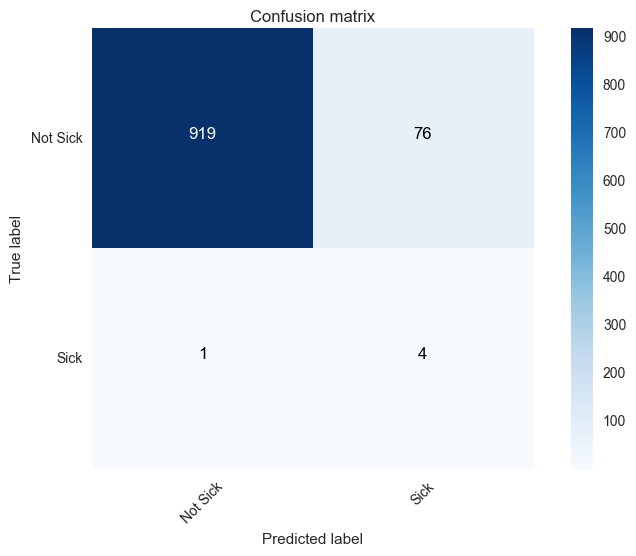

In [50]:
print 'New Classifier'
print 'AUC = {}'.format(roc_auc_score(sick_true_labels, new_sick_scores))
new_sick_preds = [1 if s > .5 else 0 for s in new_sick_scores]
plot_confusion_matrix(confusion_matrix(sick_true_labels, new_sick_preds), labels)
print
plt.grid(False)

Comp Classifier
AUC = 0.837386934673
Confusion matrix, without normalization
[[994   1]
 [  2   3]]



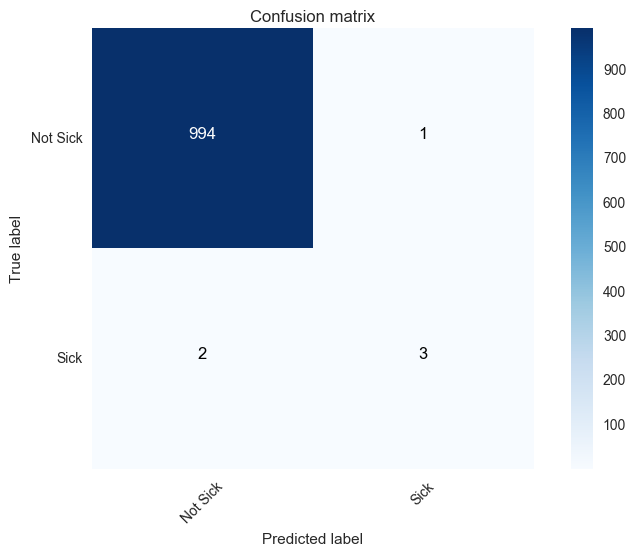

In [59]:
print 'Comp Classifier'
labels = ['Not Sick','Sick']
print 'AUC = {}'.format(roc_auc_score(sick_true_labels, new_sick_scores))
new_sick_preds = [1 if s > .5 else 0 for s in new_sick_scores]
comp_sick_preds = [o and n for o,n in zip(old_sick_preds, new_sick_preds)]
plot_confusion_matrix(confusion_matrix(sick_true_labels, comp_sick_preds), labels)
print
plt.grid(False)

# Analyzing new vs old multiple classifier

In [51]:
new = joblib.load('paper_stuff/best_classifiers/logreg_mult_best.pkl')

/Users/thomaseffland/.virtualenvs/research/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: The file 'paper_stuff/best_classifiers/logreg_mult_best.pkl' has been generated with a joblib version less than 0.10. Please regenerate this pickle file.
  if __name__ == '__main__':


In [52]:
old_mult_scores = [ 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.0, 0.05555555555555555, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.0, 1.0, 0.05555555555555555, 0.6666666666666666, 0.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.6666666666666666, 1.0, 0.05555555555555555, 0.0, 0.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 0.0, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 0.6666666666666666, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.6666666666666666, 0.05555555555555555, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 0.0, 1.0, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.0, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 1.0, 0.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 1.0, 0.0, 0.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.6666666666666666, 1.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 0.0, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.0, 0.6666666666666666, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 0.6666666666666666, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 0.0, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 0.6666666666666666, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 1.0, 1.0, 0.0, 0.05555555555555555, 0.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.6666666666666666, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.0, 1.0, 0.0, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 0.6666666666666666, 0.0, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.0, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 1.0, 0.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 0.6666666666666666, 0.05555555555555555, 1.0, 0.6666666666666666, 0.05555555555555555, 0.0, 1.0, 0.05555555555555555, 1.0, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555, 0.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.6666666666666666, 0.6666666666666666, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 0.0, 0.6666666666666666, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.6666666666666666, 0.0, 1.0, 0.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.6666666666666666, 0.0, 1.0, 1.0, 0.0, 1.0, 0.6666666666666666, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.0, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.6666666666666666, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 0.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 1.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.05555555555555555, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.05555555555555555, 1.0, 0.0, 0.0, 1.0, 1.0, 0.05555555555555555, 1.0, 0.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 0.05555555555555555, 1.0, 1.0, 1.0, 1.0, 0.05555555555555555, 0.05555555555555555, 0.0, 1.0, 0.6666666666666666, 0.05555555555555555, 0.05555555555555555,  ]

<Container object of 1000 artists>

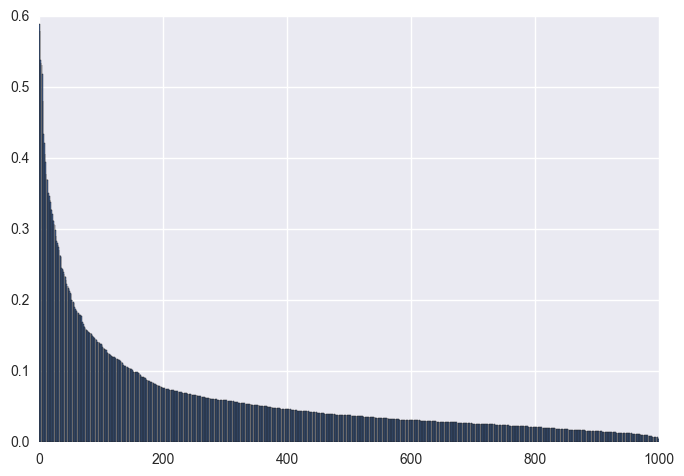

In [65]:
plt.bar(range(len(new_mult_scores)),sorted(new_mult_scores, reverse=True))

In [53]:
new_mult_scores = new.predict_proba(sample['text'])[:,1]

In [54]:
mult_true_labels = sample['Is_Multiple_Foodborne'].as_matrix()

Old Classifier
AUC = 0.813813813814
Confusion matrix, without normalization
[[582 417]
 [  0   1]]



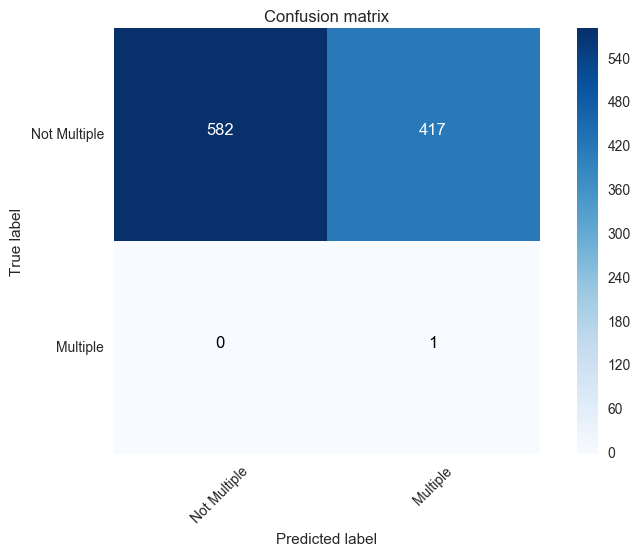

In [55]:
labels = ['Not Multiple', 'Multiple']
print 'Old Classifier'
print 'AUC = {}'.format(roc_auc_score(mult_true_labels, old_mult_scores))
old_mult_preds = [1 if s > .5 else 0 for s in old_mult_scores]
plot_confusion_matrix(confusion_matrix(mult_true_labels, old_mult_preds), labels)
print
plt.grid(False)

New Classifier
AUC = 0.998998998999
Confusion matrix, without normalization
[[997   2]
 [  0   1]]



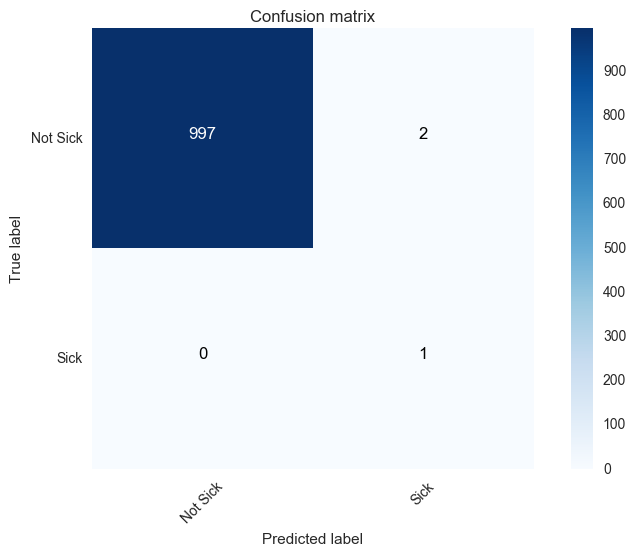

In [60]:
print 'New Classifier'
print 'AUC = {}'.format(roc_auc_score(mult_true_labels, new_mult_scores))
new_mult_preds = [1 and p if s > .5 else 0 for s, p in zip(new_mult_scores, new_sick_preds)]
plot_confusion_matrix(confusion_matrix(mult_true_labels, new_mult_preds), labels)
print
plt.grid(False)

In [57]:
# Looking for restaurant stratification

In [20]:
import json
from io import open

In [21]:
review2rest = {}

for i, line in enumerate(open('../FoodborneNYC/foodbornenyc/sources/yelpfiles/yelp_businesses.json', encoding='utf8')):
    print '\r', i,
    data = json.loads(line)
    for review in data['reviews']:
        review2rest[review['text']] = data['name']

38918


In [38]:
train_df = pd.read_csv('paper_stuff/data/Sick/yelp_sick_dev_data_small.csv', encoding='utf8')

In [39]:
train_df.head()

,data,label
0,My friends and I ordered 3 burgers and a pitch...,1
1,Went here yesterday with a friend. We both go...,1
2,If I was writing this review for Choice Market...,1
3,"First, let me just say I have had El Rey numer...",1
4,Disappointment: the tapas taste quite well and...,1


In [40]:
train_df.shape

(1392, 2)

In [41]:
import HTMLParser
parser = HTMLParser.HTMLParser()

In [44]:
miss_count =0
restaurant_set = [] 
for review in [ parser.unescape(r) for r in train_df['data'].tolist()]:
    if review in review2rest:
        restaurant_set.append(review2rest[review])
    else:
        if miss_count < 10:
            print review
            print '*'*80
        miss_count +=1 

My friends and I ordered 3 burgers and a pitcher of sangria. Everything tasted good. Later on in the day we all got a stomach ache then 1 by 1 we all had to use the restroom several times before the days end. I love this place, but something there made us sick. 

If I go back, I'm going to stick with bottled beer.
********************************************************************************
Went here yesterday with a friend.  We both got food poisoning, most likely from the cajun chicken. Resulted in a pretty rough night last night and for my friend, a rough day today (will spare the details, but you can imagine).

Would recommend steering clear unless you're looking to ruin about 24 hours of your life.

Good happy hour special though after the last 24 hours I'd stick to bottled beverages, trust factor on anything prepared there is low.

As an aside, during a previous trip, we were required to order at our tables rather than the counter, this caused the length of our visit to nearly

In [43]:
print miss_count/float(train_df.shape[0])

0.375
